<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [65]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import pylab
import numpy
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

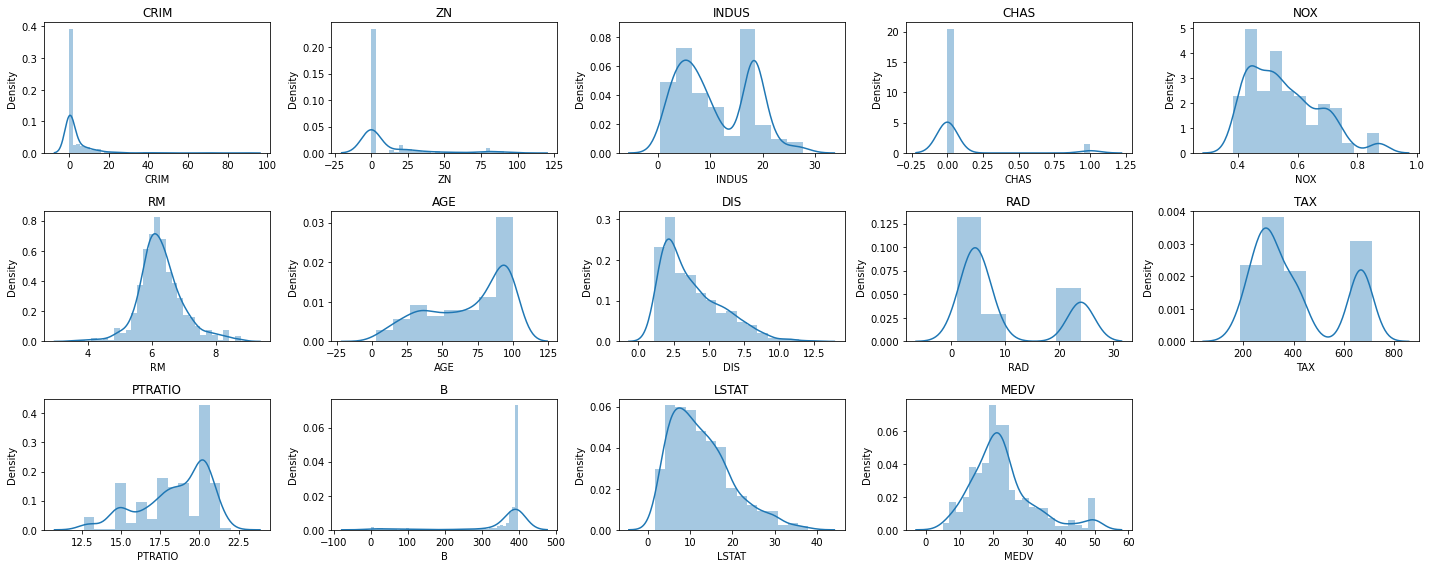

In [16]:
plt.figure(figsize=(20,8))
for idx, f in enumerate(data.columns):
    plt.subplot(3,5,idx+1)
    sns.distplot(data[f])
    plt.title(f)
plt.tight_layout()
plt.show()

Нормальное - RM, MEDV 
Бернулли - CHAS
Геометрическое - CRIM, ZN, 
Логнормальное - INDUS, NOX, AGE, DIS, RAD, TAX, B, LSTAT
    
Ограниченное количество значений придает сложность определения. Равномерное, биномиальное не нашлись. 

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

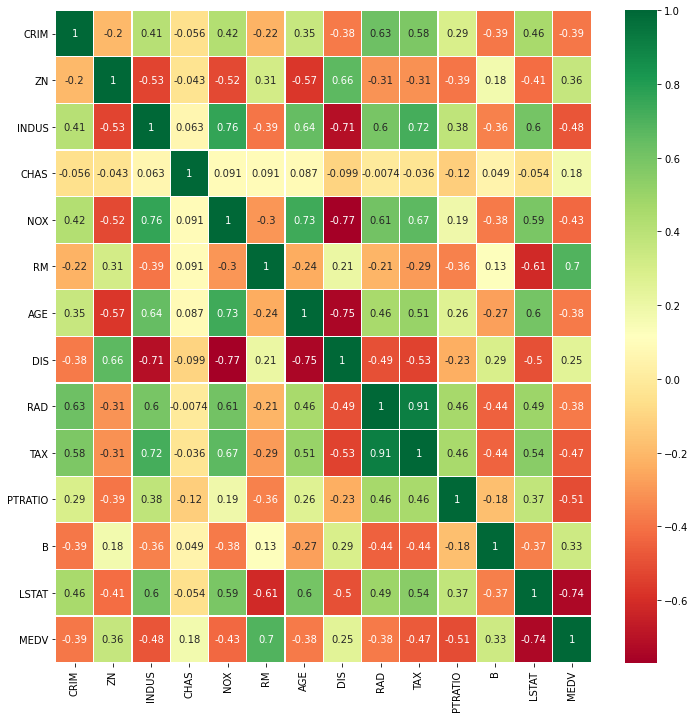

In [17]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Количество комнат (RM) больше всего влияет на цену (MEDV)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [18]:
MEDV = np.array(data['MEDV']).reshape(-1,1)
LSTAT = np.array(data['LSTAT']).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
# делим данные 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    MEDV,
    LSTAT,
    test_size = 0.2
)

In [25]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

In [24]:
# ошибка
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

29.020927324510918
4.112413222287053


Точность 4% (?)

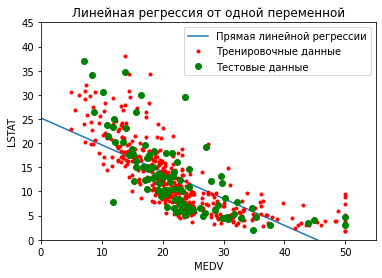

In [35]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,55)
plt.ylim(0,45)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

В дорогих квартирах низкий социальный статус не живет. Основное скопление 12000-25000 долларов

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [60]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [52]:
data.shape

(156, 11)

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [53]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

В Country нет отсутствующих значений

Сколько стран в выборке? Написать ответ. 

In [56]:
len(data['Country (region)'])

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

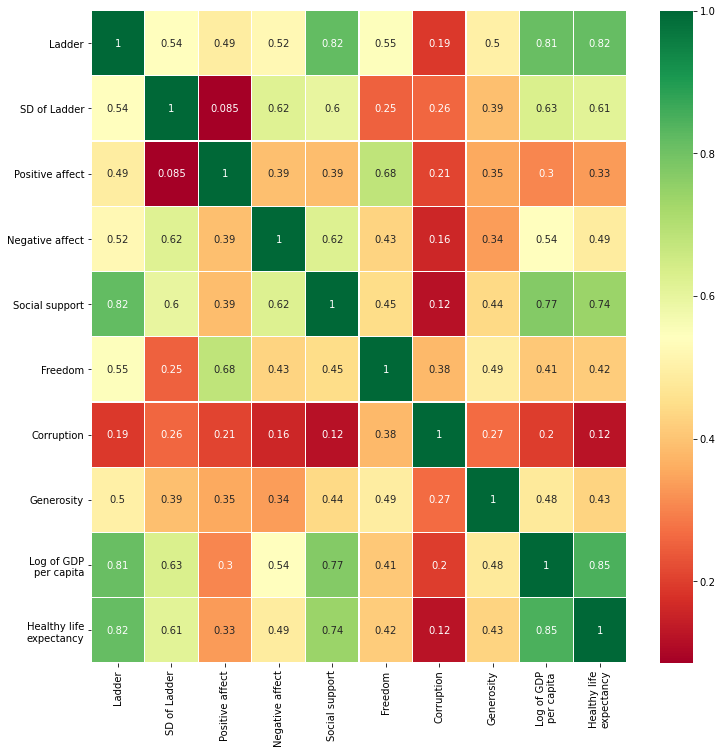

In [58]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

На ожидмаемую продолжительность здоровой жизни сильно влияет ВВП и меньше всего восприятие коррупции.
На чувство свободы больше всего влияют положительные чувства.
На меру удовлетворенностью жизнью (Ladder) больше всего влияют ВВП и ожидаемая продолжительность жизни (Финляндия тому доказательство). 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

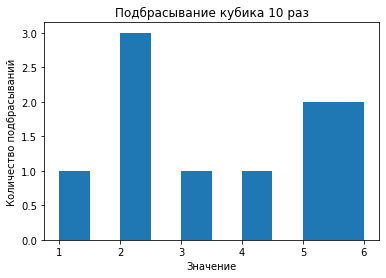

In [79]:
sum = 10
value = numpy.random.randint(1, 7, size = sum)
pylab.hist(value)

pylab.xlabel('Значение')
pylab.ylabel('Количество подбрасываний')
pylab.title('Подбрасывание кубика ' + str(sum) + ' раз')
pylab.show()

Логнормальное распределение

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

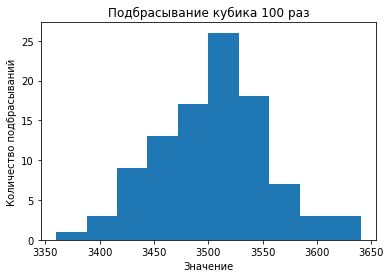

In [89]:
sum = 100
value = numpy.random.randint(1, 7, size = sum)
for i in range (999):
    value = value + numpy.random.randint(1, 7, size = sum)
pylab.hist(value)

pylab.xlabel('Значение')
pylab.ylabel('Количество подбрасываний')
pylab.title('Подбрасывание кубика ' + str(sum) + ' раз')
pylab.show()

Сумма независимых (в этом случае рандомных) и одинаково распределенных случайных величин, имеет распределение, близкое к нормальному. Еще примеры:

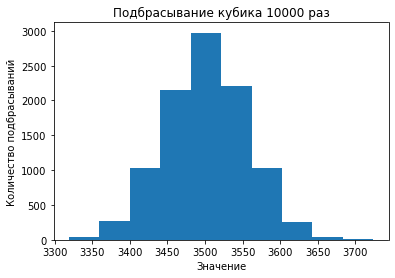

In [92]:
sum = 10000
value = numpy.random.randint(1, 7, size = sum)
for i in range (999):
    value = value + numpy.random.randint(1, 7, size = sum)
pylab.hist(value)

pylab.xlabel('Значение')
pylab.ylabel('Количество подбрасываний')
pylab.title('Подбрасывание кубика ' + str(sum) + ' раз')
pylab.show()

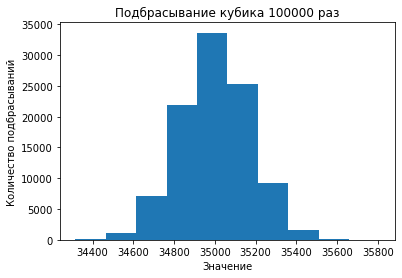

In [95]:
sum = 100000
value = numpy.random.randint(1, 7, size = sum)
for i in range (9999):
    value = value + numpy.random.randint(1, 7, size = sum)
pylab.hist(value)

pylab.xlabel('Значение')
pylab.ylabel('Количество подбрасываний')
pylab.title('Подбрасывание кубика ' + str(sum) + ' раз')
pylab.show()